In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
DATASET_DIRECTORY = "../march-machine-learning-mania-2024/"

In [6]:
TOURNMENT_COMPACT_RESULTS = DATASET_DIRECTORY + 'MNCAATourneyCompactResults.csv'
TEAM_IDS =  DATASET_DIRECTORY + 'MTeams.csv'
TEAM_CONFERENCES = DATASET_DIRECTORY + 'MTeamConferences.csv'
CONFERENCES = DATASET_DIRECTORY + 'Conferences.csv'


In [7]:
tourney_results = pd.read_csv(TOURNMENT_COMPACT_RESULTS, index_col=False)
tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0


In [8]:
team_ids = pd.read_csv(TEAM_IDS, index_col=False)
team_ids.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2024
1,1102,Air Force,1985,2024
2,1103,Akron,1985,2024
3,1104,Alabama,1985,2024
4,1105,Alabama A&M,2000,2024


In [9]:
team_confs = pd.read_csv(TEAM_CONFERENCES, index_col=False)
team_confs.head()

,Season,TeamID,ConfAbbrev
0,1985,1102,wac
1,1985,1103,ovc
2,1985,1104,sec
3,1985,1106,swac
4,1985,1108,swac


In [10]:
confs = pd.read_csv(CONFERENCES, index_col=False)
confs.head()

,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference
3,acc,Atlantic Coast Conference
4,aec,America East Conference


In [11]:
# Get national championship games
championship_games = tourney_results.loc[tourney_results['DayNum'] == 154]
championship_games.reset_index(drop=True, inplace=True)
print(len(championship_games))
championship_games.head()

38


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,154,1437,66,1207,64,N,0
1,1986,154,1257,72,1181,69,N,0
2,1987,154,1231,74,1393,73,N,0
3,1988,154,1242,83,1328,79,N,0
4,1989,154,1276,80,1371,79,N,1


In [12]:
champions = championship_games['WTeamID']
champion_names = team_ids.loc[team_ids['TeamID'].isin(champions)]
champion_names

,TeamID,TeamName,FirstD1Season,LastD1Season
11,1112,Arizona,1985,2024
15,1116,Arkansas,1985,2024
23,1124,Baylor,1985,2024
62,1163,Connecticut,1985,2024
80,1181,Duke,1985,2024
95,1196,Florida,1985,2024
130,1231,Indiana,1985,2024
141,1242,Kansas,1985,2024
145,1246,Kentucky,1985,2024
156,1257,Louisville,1985,2024


In [13]:
tourney_results['DayNum'].value_counts()

DayNum
137    608
136    596
138    311
139    304
143    148
144    148
145     78
146     78
152     76
154     38
134     32
135     22
140      8
147      2
148      2
Name: count, dtype: int64

In [14]:
tourney_results['WLoc'].value_counts()

WLoc
N    2451
Name: count, dtype: int64

In [16]:
tourney_results = tourney_results[tourney_results['Season'] >= 2010]
tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
1584,2010,134,1115,61,1457,44,N,0
1585,2010,136,1124,68,1358,59,N,0
1586,2010,136,1139,77,1431,59,N,0
1587,2010,136,1140,99,1196,92,N,2
1588,2010,136,1242,90,1250,74,N,0


In [21]:
import math

In [58]:
n_conferences = len(team_confs[team_confs['Season'] >= 2010]['ConfAbbrev'].unique())
n_conferences

35

In [59]:
conf_abbrev_to_id = { abbrev : id for id, abbrev in enumerate(team_confs[team_confs['Season'] >= 2010]['ConfAbbrev'].unique()) }

In [60]:
distribution_of_wins_per_conference_each_round = { round : np.zeros(n_conferences) for round in range(int(math.log2(64))) }
distribution_of_appearances_per_conference_each_round = { round : np.zeros(n_conferences) for round in range(int(math.log2(64))) }

In [38]:
team_ids.head()

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2024
1,1102,Air Force,1985,2024
2,1103,Akron,1985,2024
3,1104,Alabama,1985,2024
4,1105,Alabama A&M,2000,2024


In [43]:
team_confs = team_confs[team_confs['Season'] >= 2010]
team_confs.head()

,Season,TeamID,ConfAbbrev
7749,2010,1102,mwc
7750,2010,1103,mac
7751,2010,1104,sec
7752,2010,1105,swac
7753,2010,1106,swac


In [44]:
tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
1584,2010,134,1115,61,1457,44,N,0
1585,2010,136,1124,68,1358,59,N,0
1586,2010,136,1139,77,1431,59,N,0
1587,2010,136,1140,99,1196,92,N,2
1588,2010,136,1242,90,1250,74,N,0


In [46]:
tourney_results['WTeamID'] = tourney_results['WTeamID'].apply(lambda id : conf_abbrev_to_id[team_confs[team_confs['TeamID'] == id]['ConfAbbrev'].unique()[0]])
tourney_results['LTeamID'] = tourney_results['LTeamID'].apply(lambda id : conf_abbrev_to_id[team_confs[team_confs['TeamID'] == id]['ConfAbbrev'].unique()[0]])

In [47]:
tourney_results.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
1584,2010,134,3,61,23,44,N,0
1585,2010,136,10,68,21,59,N,0
1586,2010,136,18,77,30,59,N,0
1587,2010,136,0,99,2,92,N,2
1588,2010,136,10,90,5,74,N,0


In [61]:
for season in tourney_results['Season'].unique():
    season_tournment = tourney_results[tourney_results['Season'] == season][::-1]
    start_index = 0
    for round in range(int(math.log2(64))):
        num_games = 2 ** round
        conference_wins = distribution_of_wins_per_conference_each_round[round]
        conference_appearances = distribution_of_appearances_per_conference_each_round[round]
        tournament_round_games = season_tournment[start_index:start_index + num_games]
        for winning_team_conf_id, losing_team_conf_id in zip(tournament_round_games['WTeamID'], tournament_round_games['LTeamID']):
            conference_wins[winning_team_conf_id] += 1
            conference_appearances[winning_team_conf_id] += 1
            conference_appearances[losing_team_conf_id] += 1
        start_index = start_index + num_games
        

In [62]:
print(distribution_of_appearances_per_conference_each_round)

{0: array([1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 6., 0., 0.,
       0., 2., 0., 0., 0., 0., 0., 0., 0., 6., 0., 0., 0., 0., 2., 3., 0.,
       0.]), 1: array([ 1.,  0.,  7.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  6.,  0.,  0.,
        0.,  8.,  1.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       11.,  0.,  0.,  1.,  1.,  2.,  8.,  0.,  0.]), 2: array([ 1.,  0., 17.,  0.,  0.,  0.,  0.,  8.,  1.,  0., 16.,  0.,  0.,
        0., 16.,  2.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,
       16.,  0.,  0.,  1.,  2.,  5., 13.,  0.,  0.]), 3: array([ 5.,  1., 25.,  0.,  0.,  0.,  0., 21.,  1.,  0., 26.,  1.,  0.,
        1., 31.,  5.,  2.,  0.,  5.,  0.,  1.,  0.,  1.,  0.,  8.,  0.,
       28.,  0.,  0.,  1.,  4.,  9., 32.,  0.,  0.]), 4: array([14.,  5., 41.,  0.,  1.,  1.,  2., 29.,  5.,  5., 52.,  2.,  1.,
        3., 47., 14.,  5.,  1.,  9.,  1.,  1.,  3.,  2.,  1., 20.,  0.,
       57.,  0.,  0.,  7., 11., 17., 59.,  0.,  0.]), 5: array([32., 13., 58.,  7.,

In [57]:
print(distribution_of_wins_per_conference_each_round)

{0: array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 4., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 6., 0., 0., 0., 0., 0., 0., 0.,
       0.]), 1: array([1., 0., 2., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0., 6., 0., 0.,
       0., 2., 0., 0., 0., 0., 0., 0., 0., 6., 0., 0., 0., 0., 2., 3., 0.,
       0.]), 2: array([ 1.,  0.,  7.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  6.,  0.,  0.,
        0.,  8.,  1.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       11.,  0.,  0.,  1.,  1.,  2.,  8.,  0.,  0.]), 3: array([ 1.,  0., 17.,  0.,  0.,  0.,  0.,  8.,  1.,  0., 16.,  0.,  0.,
        0., 16.,  2.,  0.,  0.,  3.,  0.,  1.,  0.,  0.,  0.,  2.,  0.,
       16.,  0.,  0.,  1.,  2.,  5., 13.,  0.,  0.]), 4: array([ 5.,  1., 25.,  0.,  0.,  0.,  0., 21.,  1.,  0., 26.,  1.,  0.,
        1., 31.,  5.,  2.,  0.,  5.,  0.,  1.,  0.,  1.,  0.,  8.,  0.,
       28.,  0.,  0.,  1.,  4.,  9., 32.,  0.,  0.]), 5: array([14.,  5., 41.,  0.,  1.,  1.,  2., 29.,  5.,  5., 52.,

In [63]:
import matplotlib.pyplot as plt

In [66]:
import seaborn as sns

In [67]:
round_to_title = {0: 'National Championship', 1: 'Final Four', 2: 'Elite Eight', 3: 'Sweet Sixteen', 4: 'Round of 32', 5: 'Round of 64'}

/var/folders/vp/7cb3bs4171vd6ywq0xgznpbh0000gn/T/ipykernel_26222/3296800635.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
/var/folders/vp/7cb3bs4171vd6ywq0xgznpbh0000gn/T/ipykernel_26222/3296800635.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
/var/folders/vp/7cb3bs4171vd6ywq0xgznpbh0000gn/T/ipykernel_26222/3296800635.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
/var/folders/vp/7cb3bs4171vd6ywq0xgznpbh0000gn/T/ipykernel_26222/3296800635.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() o

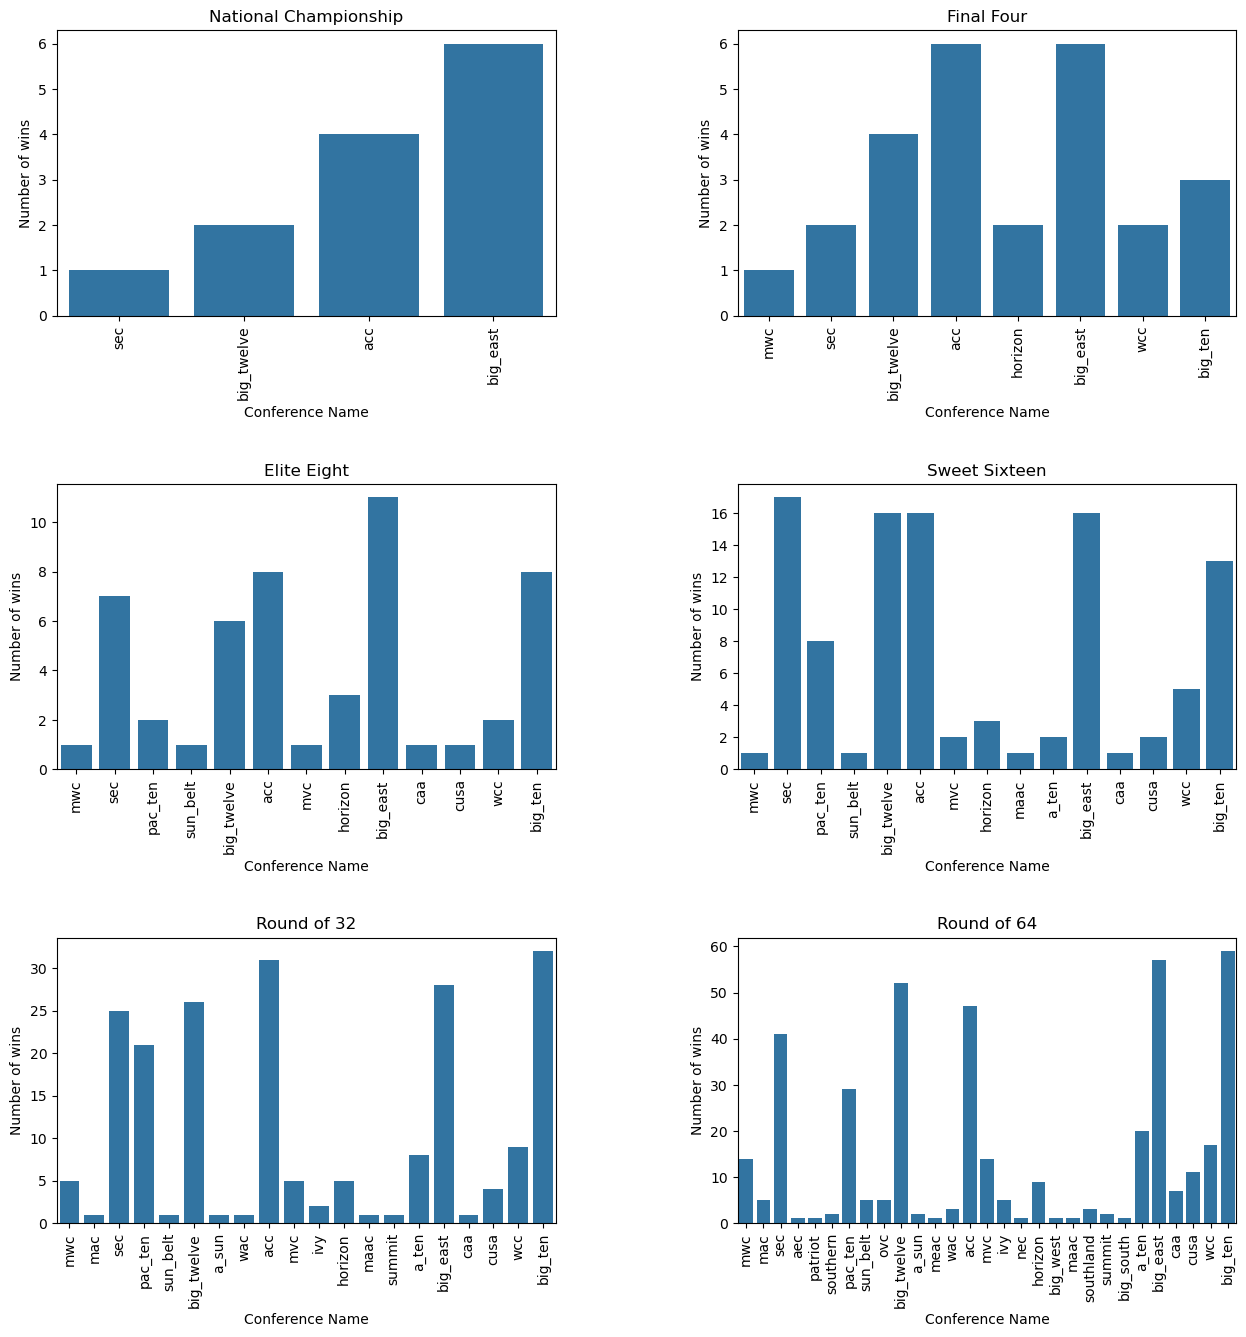

In [80]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))
plt.tight_layout(pad=10.0)

for round, wins in distribution_of_wins_per_conference_each_round.items():
    conf_name_to_wins = []
    for conf_name, id in conf_abbrev_to_id.items():
        if wins[id] != 0:
            conf_name_to_wins.append([conf_name, wins[id]])

    df = pd.DataFrame(conf_name_to_wins, columns=["Conference Name", "Number of wins"])
    row, col = round // 2, round % 2
    plot = sns.barplot(data=df, x="Conference Name", y="Number of wins", ax=axes[row][col])
    plot.set_title(round_to_title[round])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

fig.show()

/var/folders/vp/7cb3bs4171vd6ywq0xgznpbh0000gn/T/ipykernel_26222/599643053.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
/var/folders/vp/7cb3bs4171vd6ywq0xgznpbh0000gn/T/ipykernel_26222/599643053.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
/var/folders/vp/7cb3bs4171vd6ywq0xgznpbh0000gn/T/ipykernel_26222/599643053.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plot.set_xticklabels(plot.get_xticklabels(), rotation=90)
/var/folders/vp/7cb3bs4171vd6ywq0xgznpbh0000gn/T/ipykernel_26222/599643053.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or us

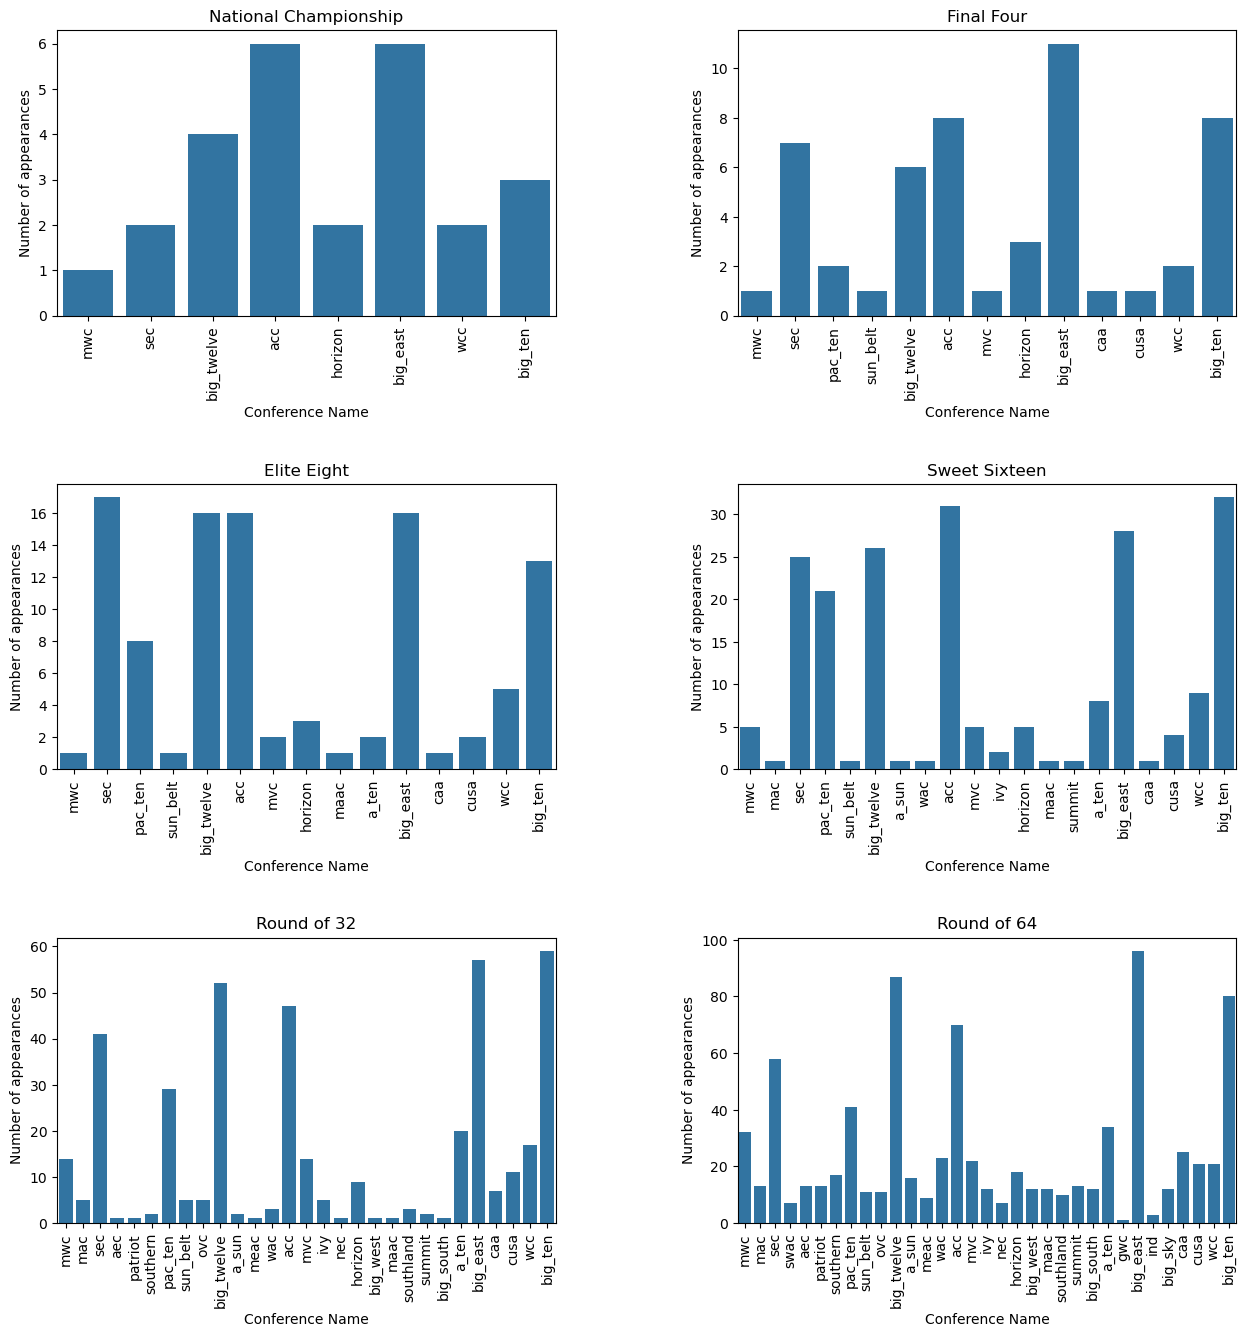

In [81]:
fig, axes = plt.subplots(3, 2, figsize=(15,15))
plt.tight_layout(pad=10.0)

for round, wins in distribution_of_appearances_per_conference_each_round.items():
    conf_name_to_wins = []
    for conf_name, id in conf_abbrev_to_id.items():
        if wins[id] != 0:
            conf_name_to_wins.append([conf_name, wins[id]])

    df = pd.DataFrame(conf_name_to_wins, columns=["Conference Name", "Number of appearances"])
    row, col = round // 2, round % 2
    plot = sns.barplot(data=df, x="Conference Name", y="Number of appearances", ax=axes[row][col])
    plot.set_title(round_to_title[round])
    plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

fig.show()